In [2]:
# Requirements installation: googlemaps

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import googlemaps
from datetime import datetime

## FUNCTIONS 

In [4]:
def keep_numeric(x):
    return re.sub("[^0-9]", "", x)

def replace_price(x):
    if x == "£":
        return 1
    if x == "££": 
        return 2 
    if x == "£££": 
        return 3 
    if x == "££££": 
        return 4 
    
#Function latitude/ longitude

def latitude(column):
    key = pd.read_csv("../raw_data/api_key.csv", header=None)
    key = key.loc[0,0]
    gmaps = googlemaps.Client(key=key)
    # Geocoding an address
    geocode_result = gmaps.geocode(column)
    return float(geocode_result[0]['geometry']['location']['lat'])

def longitude(column):
    key = pd.read_csv("../raw_data/api_key.csv", header=None)
    key = key.loc[0,0]
    gmaps = googlemaps.Client(key=key)
    # Geocoding an address
    geocode_result = gmaps.geocode(column)
    return float(geocode_result[0]['geometry']['location']['lng'])

def get_postal_code(x):
    g = re.findall(r'\d{4}-\d{3}', x)
    if g ==[]: 
        return '1100-083'
    else: 
        return g[0]
    
#Function labels 
def labels_eat_on_site (x):
    if 'dine-in' in x:
        return 1 
    else: 
        return 0
    
def labels_delivery (x):
    if ('delivery' in x) or ('no-contact delivery' in x):
        if ( 'no delivery' in (x)):
            return 0
        else: 
            return 1
    else: 
        return 0
    
def labels_takeaway (x):
    if ('takeaway' in x):
        return 1
    else: 
        return 0

def labels_drive_thru (x):
    if ('drive-through' in x):
        return 1
    else: 
        return 0
    
def labels_no_del(x):
    if ( 'no delivery' in (x)):
        return 1
    else: 
        return 0    
    
def labels_curbside(x):
    if ( 'curbside pickup' in (x)):
        return 1
    else: 
        return 0
    
#post code format for post codes table 
def post_code2(x):
    return (x[0:4]+'-'+x[4:])  

In [5]:
def keep_numeric(x):
    return re.sub("[^0-9]", "", x)

In [6]:
def replace_price(x):
    if x == "£":
        return 1
    if x == "££": 
        return 2 
    if x == "£££": 
        return 3 
    if x == "££££": 
        return 4 

In [7]:
#Function latitude/ longitude

def latitude(column):
    key = pd.read_csv("../raw_data/api_key.csv", header=None)
    key = key.loc[0,0]
    gmaps = googlemaps.Client(key=key)
    # Geocoding an address
    geocode_result = gmaps.geocode(column)
    return float(geocode_result[0]['geometry']['location']['lat'])

def longitude(column):
    key = pd.read_csv("../raw_data/api_key.csv", header=None)
    key = key.loc[0,0]
    gmaps = googlemaps.Client(key=key)
    # Geocoding an address
    geocode_result = gmaps.geocode(column)
    return float(geocode_result[0]['geometry']['location']['lng'])

In [8]:
def get_postal_code(x):
    g = re.findall(r'\d{4}-\d{3}', x)
    if g ==[]: 
        return '1100-083'
    else: 
        return g[0]

In [9]:
#Function labels 
def labels_eat_on_site (x):
    if 'dine-in' in x:
        return 1 
    else: 
        return 0
    
def labels_delivery (x):
    if ('delivery' in x) or ('no-contact delivery' in x):
        if ( 'no delivery' in (x)):
            return 0
        else: 
            return 1
    else: 
        return 0
    
def labels_takeaway (x):
    if ('takeaway' in x):
        return 1
    else: 
        return 0

def labels_drive_thru (x):
    if ('drive-through' in x):
        return 1
    else: 
        return 0
    
def labels_no_del(x):
    if ( 'no delivery' in (x)):
        return 1
    else: 
        return 0    
    
def labels_curbside(x):
    if ( 'curbside pickup' in (x)):
        return 1
    else: 
        return 0

In [10]:
#post code format for post codes table 
def post_code2(x):
    return (x[0:4]+'-'+x[4:])  

In [11]:
def deletespace(x):
    return x.strip()

def replace_type(x):
    result=x
    for k, v in dico.items():
        if x in v:
            result=k
    return result

## Preprocessing of columns

In [361]:
# Importing the data in form 1 and basic preprocessing 
#data= pd.read_csv("../raw_data/restaurants2 - Copy.csv", header= None)
#data=data.rename(columns={0:"Index", 1:"name" , 2:"type", 3:"description", 4:"rating", 5:"review_count", 6: "price", 7:"address", 8:"label"})
#data=data.drop(columns='Index') # Check whether to keep it or not 

In [378]:
# Importing the data in form 2 and basic preprocessing (this takes a bit of time)
data= pd.read_csv("../raw_data/restaurants_clean (2).csv")
data=data.rename(columns={0:"Index", 'restaurant_name':"name" , 'restaurant_category':"type", 'restaurant_description':"description", 'restaurant_rating':"rating", 'restaurant_comment_number':"review_count", 'restaurant_price_range': "price", 'restaurant_location':"address", 'restaurant_services':"label"})
data=data.drop(columns=['Index', 'Unnamed: 0']) # Check whether to keep it or not 
data=data.dropna(subset=['rating']) # dropping rows with no rating 
data.label=data.label.fillna(value='Dine-in')# replacing rows with no label by ['Dine-in']
data.type=data.type.fillna(value='Restaurant')

In [379]:
# Column rating 
data.rating=pd.to_numeric(data.rating, downcast="float")

# Column review_count 
data.review_count=data.review_count.map(keep_numeric)
data.review_count=pd.to_numeric(data.review_count, downcast="float")

#Column price 
data.price = data.price.map(replace_price)

#Adress into latitude and longitude 
#data['latitude']=data.address.map(latitude)
#data['longitude']=data.address.map(longitude)

# handling the label 
data.label= data['label'].str.lower()
data['dine_in']=data.label.map(labels_eat_on_site)
data['takeaway']=data.label.map(labels_takeaway)
data['delivery']=data.label.map(labels_delivery)
data['drive_through']=data.label.map(labels_drive_thru)
data['no_del_exp']=data.label.map(labels_no_del)
data['curb_pickup']=data.label.map(labels_curbside)

# handling the type
data.type=data.type.replace('restaurant', '', regex=True)
data.type= data.type.str.lower()

#add postal code
data['postal_code']=data.address.map(get_postal_code)

#handling remaining null values (price):
#data.price=data.price.fillna(value=np.mean(data.price)).astype(int) ## CHOICE 1 TO BE CONFIRMED: FILLING THE NA O


In [364]:
data.head(2)

,name,type,description,rating,review_count,price,address,label,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code
0,Augusto Lisboa,brunch,"Hip brunch eatery serving savory toasts, banan...",4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-491
1,Tiffin Cafe & Restaurant Lisboa,brunch,NaN,4.9,139.0,2.0,"R. do Conde 32, 1200-637 Lisboa, Portugal","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-637


## Prepropressing of postal codes table and merging with original database

In [380]:
data_post=pd.read_csv("../raw_data/cod_post_freg_matched.txt")
data_post.CodigoPostal=data_post.CodigoPostal.astype(str)
data_post.CodigoPostal=data_post.CodigoPostal.map(post_code2)
data_post=data_post[['CodigoPostal', 'Concelho', 'Freguesia']]
data_post=data_post.rename(columns={'CodigoPostal':'postal_code', 'Distrito': 'district', 'Concelho': 'municipality', 'Freguesia': 'neighborhood'} )
data=data.merge(data_post, on='postal_code', how='left')

In [318]:
data.head()

,name,type,description,rating,review_count,price,address,label,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,brunch,"Hip brunch eatery serving savory toasts, banan...",4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-491,Lisboa,Graça
1,Tiffin Cafe & Restaurant Lisboa,brunch,NaN,4.9,139.0,2.0,"R. do Conde 32, 1200-637 Lisboa, Portugal","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-637,Lisboa,Prazeres
2,Crisfama,restaurant,NaN,4.8,649.0,1.0,"Rua da Cruz de Santa Apolónia 56, 1100-188 Lis...","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-188,Lisboa,Santa Engrácia
3,Alma,fine dining,High-end restaurant with avant-garde local mea...,4.8,953.0,4.0,"R. Anchieta 15, 1200-224 Lisboa, Portugal","['dine-in', 'no takeaway', 'no delivery']",1,1,0,0,1,0,1200-224,Lisboa,São Paulo
4,Restaurant CHULHO & Bar,restaurant,NaN,4.9,180.0,NaN,"R. de São João da Mata 82, 1200-850 Lisboa, Po...","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-850,Lisboa,Lapa


In [319]:
data.to_csv('../raw_data/Clean_data_1_12_v2.csv')

## Exploration

### overall ratings 

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1010
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1011 non-null   object 
 1   type           1011 non-null   object 
 2   description    116 non-null    object 
 3   rating         1011 non-null   float32
 4   review_count   1011 non-null   float32
 5   price          571 non-null    float64
 6   address        1011 non-null   object 
 7   label          1011 non-null   object 
 8   dine_in        1011 non-null   int64  
 9   takeaway       1011 non-null   int64  
 10  delivery       1011 non-null   int64  
 11  drive_through  1011 non-null   int64  
 12  no_del_exp     1011 non-null   int64  
 13  curb_pickup    1011 non-null   int64  
 14  postal_code    1011 non-null   object 
 15  municipality   1002 non-null   object 
 16  neighborhood   1002 non-null   object 
dtypes: float32(2), float64(1), int64(6), object(8)
memor

In [321]:
data.head()

,name,type,description,rating,review_count,price,address,label,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,brunch,"Hip brunch eatery serving savory toasts, banan...",4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-491,Lisboa,Graça
1,Tiffin Cafe & Restaurant Lisboa,brunch,NaN,4.9,139.0,2.0,"R. do Conde 32, 1200-637 Lisboa, Portugal","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-637,Lisboa,Prazeres
2,Crisfama,restaurant,NaN,4.8,649.0,1.0,"Rua da Cruz de Santa Apolónia 56, 1100-188 Lis...","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-188,Lisboa,Santa Engrácia
3,Alma,fine dining,High-end restaurant with avant-garde local mea...,4.8,953.0,4.0,"R. Anchieta 15, 1200-224 Lisboa, Portugal","['dine-in', 'no takeaway', 'no delivery']",1,1,0,0,1,0,1200-224,Lisboa,São Paulo
4,Restaurant CHULHO & Bar,restaurant,NaN,4.9,180.0,NaN,"R. de São João da Mata 82, 1200-850 Lisboa, Po...","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-850,Lisboa,Lapa


(array([  5.,   0.,   0.,   4.,   8.,  11.,  39., 165., 435., 344.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

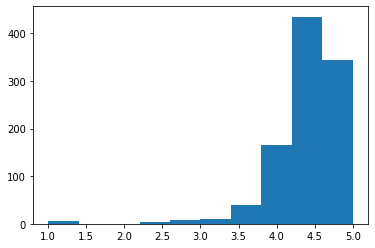

In [322]:
# Repartition of reviews
plt.hist(data.rating)

In [323]:
data[295:298]

,name,type,description,rating,review_count,price,address,label,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
295,Cafeh Tehran,middle eastern,NaN,4.6,443.0,2.0,"Praça das Flores 40, 1200-192 Lisboa, Portugal",['nan'],0,0,0,0,0,0,1200-192,Lisboa,Mercês
296,Tambarina,restaurant,Traditional African dishes & imported beer off...,4.3,349.0,1.0,"R. do Poço dos Negros 94, 1200-109 Lisboa, Por...","['dine-in', 'takeaway']",1,1,0,0,0,0,1200-109,Lisboa,São Paulo
297,Madragoa Vinhos e Petiscos,restaurant,NaN,4.1,115.0,2.0,"Rua da Esperança 156, 1200-656 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1200-656,Lisboa,Santos-o-Velho


average number of reviews per store: 629.17706
Some outliers with many reviews: 


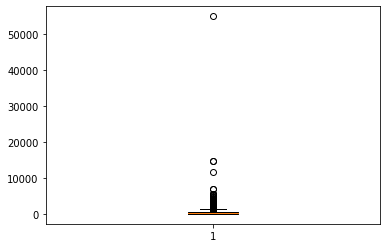

In [324]:
# number of reviews per store: 
plt.boxplot(data.review_count)

print('average number of reviews per store:', data.review_count.mean())
print('Some outliers with many reviews: ')

### Information about type of food

In [325]:
for i in data.iterrows():
    if data['type']

SyntaxError: invalid syntax (1799150728.py, line 2)

In [326]:
data.type.unique()

array(['brunch ', 'restaurant', 'fine dining ', 'seafood ', 'portuguese ',
       'peruvian ', 'basque ', 'bistro', 'tapas ', 'european ',
       'pan-asian ', 'nepalese ', 'grill', 'andalusian ', 'argentinian ',
       'health food ', 'pizza ', 'australian ', 'vegan ', 'cafe',
       'indian ', 'hamburger ', 'italian ', 'japanese ',
       'modern european ', 'mediterranean ', 'indian muslim ', 'pub',
       'dessert shop', 'moroccan ', 'bakery', 'thai ', 'dinner theatre',
       'traditional ', 'bar', 'vegetarian ', 'austrian ', 'steak house',
       'fried chicken takeaway', 'sushi ', 'asian ', 'halal ',
       'georgian ', 'gastropub', 'barbecue ', 'restaurante',
       'restaurante mexicano', 'african ', 'middle eastern ',
       'restaurante halal', 'comida rápida', 'pizaria', 'mexican ',
       'american ', 'vietnamese ', 'breakfast ', 'restaurante nepalês',
       'cocktail bar', 'pizza takeaway', 'chinese ', 'belgian ', 'fado ',
       'chicken ', 'fast food ', 'art cafe', 'co

In [373]:
data_32=data.copy()

In [374]:
data_32=data_32[data_32.type != 'restaurant']
data_32=data_32[data_32.type != 'tour operator in lisbon, portugal']

/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'brunch'),
  Text(1, 0, 'fine-dining'),
  Text(2, 0, 'seafood'),
  Text(3, 0, 'portuguese'),
  Text(4, 0, 'south_am'),
  Text(5, 0, 'mediterranean'),
  Text(6, 0, 'bistro'),
  Text(7, 0, 'tapas'),
  Text(8, 0, 'occidental'),
  Text(9, 0, 'asian'),
  Text(10, 0, 'indian'),
  Text(11, 0, 'grill'),
  Text(12, 0, 'veggie_healthy'),
  Text(13, 0, 'pizza'),
  Text(14, 0, 'cafe'),
  Text(15, 0, 'american'),
  Text(16, 0, 'italian'),
  Text(17, 0, 'japanese'),
  Text(18, 0, 'bar'),
  Text(19, 0, 'bakery_pastry'),
  Text(20, 0, 'african'),
  Text(21, 0, 'show'),
  Text(22, 0, 'fast_food'),
  Text(23, 0, 'middle_eastern'),
  Text(24, 0, 'out'),
  Text(25, 0, 'club')])

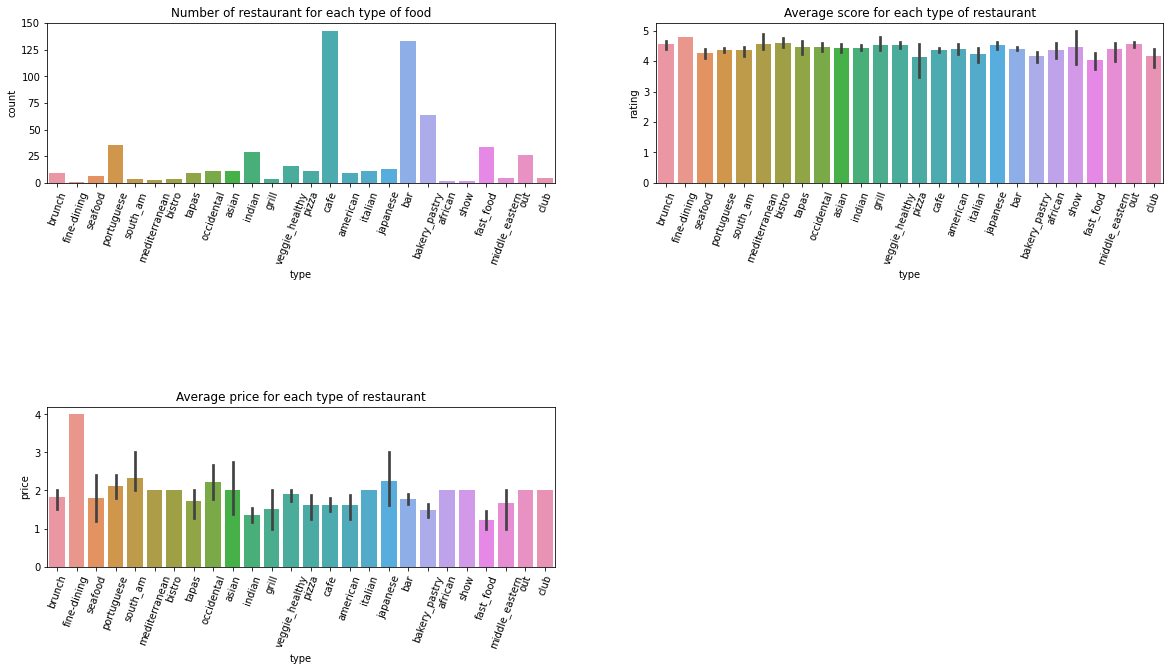

In [375]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
plt.title('Number of restaurant for each type of food')
sns.countplot(data_32.type)
plt.xticks(rotation=70)

plt.subplot(3,2,2)
plt.title('Average score for each type of restaurant')
sns.barplot(data_32.type, data.rating)
plt.xticks(rotation=70)

plt.subplot(3,2,5)
plt.title('Average price for each type of restaurant')
sns.barplot(data_32.type, data.price)
plt.xticks(rotation=70)

#plt.subplot(2,2,3)
#plt.title('Most common localization for each type of restaurant')
#data.groupby(data.type).mean()

### information about neighborhood

/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Graça'),
  Text(1, 0, 'Prazeres'),
  Text(2, 0, 'Santa Engrácia'),
  Text(3, 0, 'São Paulo'),
  Text(4, 0, 'Lapa'),
  Text(5, 0, 'Santa Catarina'),
  Text(6, 0, 'Alto do Pina'),
  Text(7, 0, 'Encarnação'),
  Text(8, 0, 'Alcântara'),
  Text(9, 0, 'Santa Isabel'),
  Text(10, 0, 'Socorro'),
  Text(11, 0, 'Anjos'),
  Text(12, 0, 'Santo Estevão'),
  Text(13, 0, 'São Jorge de Arroios'),
  Text(14, 0, 'Pena'),
  Text(15, 0, 'Madalena'),
  Text(16, 0, 'São Vicente de Fora'),
  Text(17, 0, 'Santos-o-Velho'),
  Text(18, 0, 'Mercês'),
  Text(19, 0, 'Coração de Jesus'),
  Text(20, 0, 'São José'),
  Text(21, 0, 'Sacramento'),
  Text(22, 0, 'São Miguel'),
  Text(23, 0, 'Mártires'),
  Text(24, 0, 'São Sebastião da Pedreira'),
  Text(25, 0, 'Nossa Senhora de Fátima'),
  Text(26, 0, 'São Cristóvão'

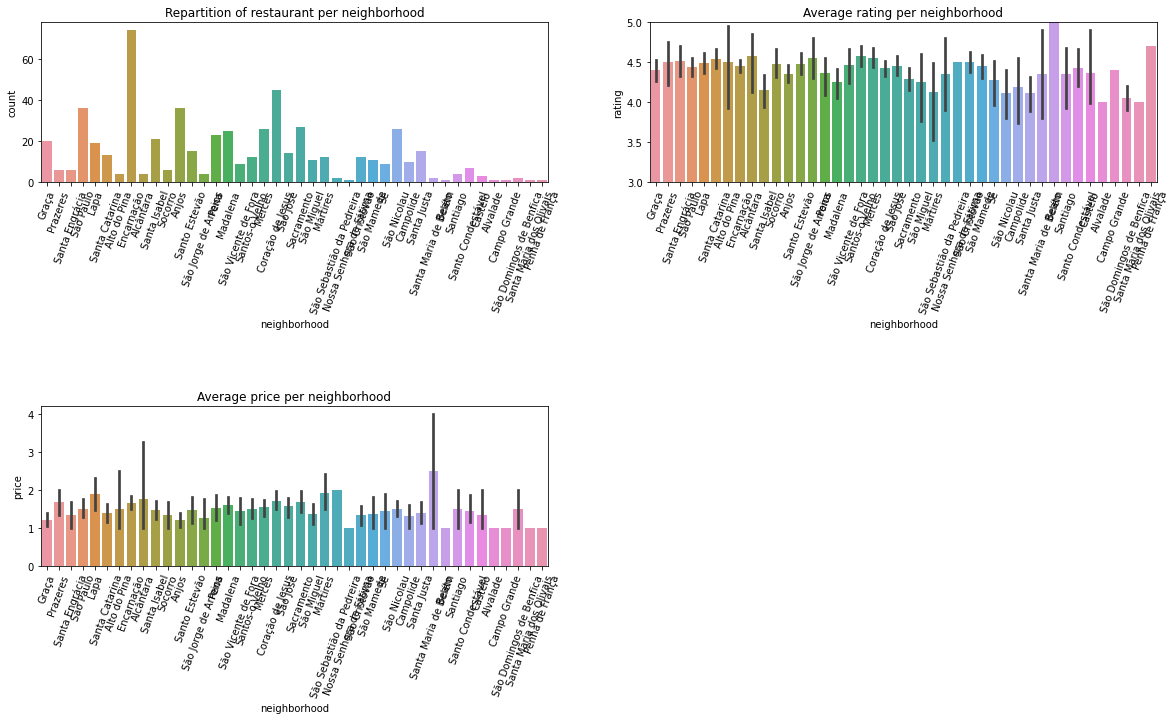

In [102]:
plt.figure(figsize=(20,10))

# Repartition of restaurant per neighborhood
plt.subplot(3,2,1)
plt.title('Repartition of restaurant per neighborhood')
sns.countplot(data.neighborhood)
plt.xticks(rotation=70)

# Average rating per neighborhood 
plt.subplot(3,2,2)
plt.title('Average rating per neighborhood')
sns.barplot(data.neighborhood, data.rating)
plt.xticks(rotation=70)
plt.ylim([3,5])
# Average price per neighborhood 
plt.subplot(3,2,5)
plt.title('Average price per neighborhood')
sns.barplot(data.neighborhood, data.price)
plt.xticks(rotation=70)

In [674]:
exct1=data[['neighborhood','takeaway', 'delivery', 'drive_through', 'curb_pickup']].groupby('neighborhood').mean()
exct1

,takeaway,delivery,drive_through,curb_pickup
neighborhood,,,,
Alcântara,0.000000,1.000000,0.000,0.000000
Alto do Pina,0.000000,0.500000,0.500,0.500000
Anjos,1.000000,0.750000,0.000,0.000000
Campolide,1.000000,1.000000,0.000,0.000000
Coração de Jesus,0.750000,0.875000,0.000,0.125000
Encarnação,0.708333,0.750000,0.000,0.041667
Graça,0.500000,1.000000,0.000,0.250000
Lapa,1.000000,1.000000,0.000,0.000000
Madalena,0.857143,0.857143,0.000,0.000000


### Correlation and pairplot

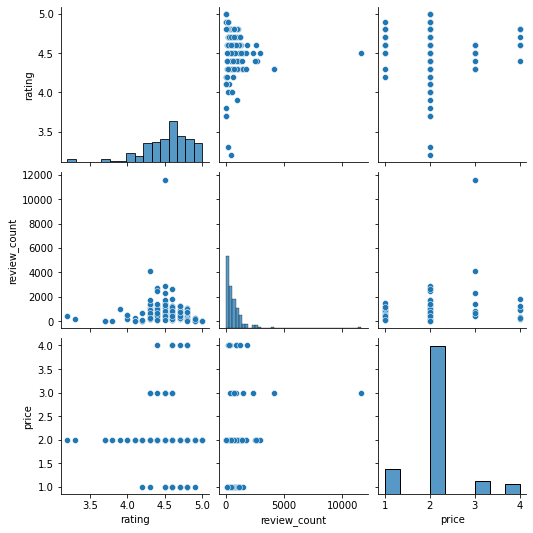

In [675]:
sns.pairplot(data[['rating', 'review_count', 'price']])

## Labels

In [103]:
data.label.value_counts()

['dine-in', 'takeaway', 'delivery']                      167
['dine-in', 'takeaway', 'no delivery']                   140
['dine-in', 'takeaway']                                   84
['dine-in', 'no delivery']                                52
['nan']                                                   29
['dine-in']                                               18
['dine-in', 'takeaway', 'no-contact delivery']            15
['dine-in', 'no takeaway', 'no delivery']                 14
['dine-in', 'curbside pickup', 'delivery']                14
['dine-in', 'curbside pickup', 'no-contact delivery']     11
['dine-in', 'curbside pickup', 'no delivery']              9
['dine-in', 'delivery']                                    6
['dine-in', 'drive-through', 'no-contact delivery']        6
['dine-in', 'drive-through', 'delivery']                   5
['dine-in', 'curbside pickup']                             3
['dine-in', 'drive-through']                               2
['dine-in', 'no takeaway

In [104]:
data.groupby('label').mean()
#regions = countries_df.groupby('Region')

,rating,review_count,price,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup
label,,,,,,,,,
"['dine-in', 'curbside pickup', 'delivery']",4.435714,558.928589,1.285714,1.0,0.0,1.0,0.0,0.0,1.0
"['dine-in', 'curbside pickup', 'no delivery']",4.566667,347.555542,1.222222,1.0,0.0,0.0,0.0,1.0,1.0
"['dine-in', 'curbside pickup', 'no-contact delivery']",4.518182,609.090881,1.272727,1.0,0.0,1.0,0.0,0.0,1.0
"['dine-in', 'curbside pickup']",4.666667,464.000000,1.666667,1.0,0.0,0.0,0.0,0.0,1.0
"['dine-in', 'delivery', 'no takeaway']",4.900000,115.000000,1.000000,1.0,1.0,1.0,0.0,0.0,0.0
"['dine-in', 'delivery']",4.466667,318.666656,1.666667,1.0,0.0,1.0,0.0,0.0,0.0
"['dine-in', 'drive-through', 'delivery']",4.420000,1455.199951,1.400000,1.0,0.0,1.0,1.0,0.0,0.0
"['dine-in', 'drive-through', 'no-contact delivery']",4.550000,2333.000000,1.500000,1.0,0.0,1.0,1.0,0.0,0.0
"['dine-in', 'drive-through']",4.650000,471.500000,1.500000,1.0,0.0,0.0,1.0,0.0,0.0


In [105]:
data23=data.groupby('takeaway').mean()
data23

,rating,review_count,price,dine_in,delivery,drive_through,no_del_exp,curb_pickup
takeaway,,,,,,,,
0,4.499371,503.880493,1.515723,0.798742,0.264151,0.08805,0.389937,0.232704
1,4.329577,700.312195,1.523474,0.995305,0.431925,0.00000,0.366197,0.000000


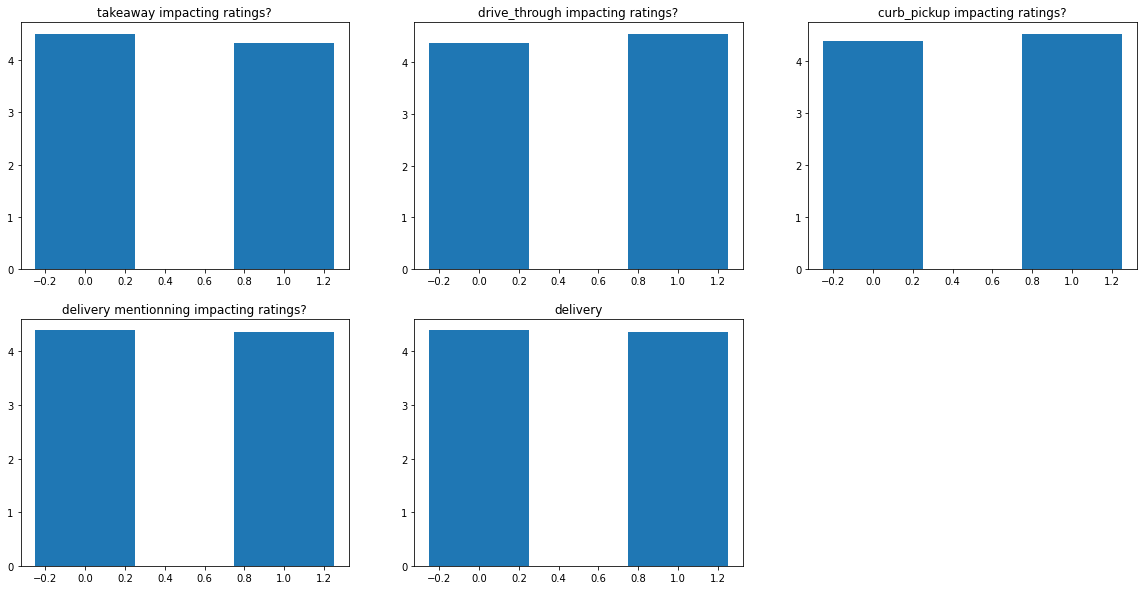

In [106]:
plt.figure(figsize=(20,10))

# takeaway
data23=data.groupby('takeaway').mean()
plt.subplot(2,3,1)
plt.title('takeaway impacting ratings?')
plt.bar(x= (0,1), height=data23.rating, width=0.5)
#plt.ylim=[4,5]

# drive_through
data24=data.groupby('drive_through').mean()
plt.subplot(2,3,2)
plt.title('drive_through impacting ratings?')
plt.bar(x= (0,1), height=data24.rating, width=0.5)
#plt.ylim=[4,5]

# curb_pickup
data25=data.groupby('curb_pickup').mean()
plt.subplot(2,3,3)
plt.title('curb_pickup impacting ratings?')
plt.bar(x= (0,1), height=data25.rating, width=0.5)
#plt.ylim=[4,5]

# Restaurant explicitely mentinning no delivery
data26=data.groupby('no_del_exp').mean()
plt.subplot(2,3,4)
plt.title('delivery mentionning impacting ratings?')
plt.bar(x= (0,1), height=data26.rating, width=0.5)
#plt.ylim=[4,5]

# delivery
data27=data.groupby('delivery').mean()
plt.subplot(2,3,5)
plt.title('delivery')
plt.bar(x= (0,1), height=data27.rating, width=0.5)
plt.ylim=[4,5]

## Mapping of coordinates of restaurant with folium 

In [680]:
import os 
import folium

In [690]:
latlonname= zip(data['latitude'],data['longitude'], data['name'], data['price'], data['rating'], data['type'])

m = folium.Map(location=[38.709223,  -9.1383], titles='small businesses', zoom_start=13.45)

for coord in latlonname:
    folium.Marker(location=[coord[0], coord[1]], tooltip=str,popup= f'\n Name: {coord[2]} \n Price ($): {coord[3]} \n Rating:{coord[4]}\n Type:{coord[5]}').add_to(m)

m
#Put only 2 digit after coma

In [697]:
data.head(1)

,name,type,description,rating,review_count,price,address,label,latitude,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,brunch,"Hip brunch eatery serving savory toasts, banan...",4.8,1032.0,2,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",38.714376,-9.130176,1,1,1,0,1,0,1100-491,Lisboa,Graça


In [766]:
data_highprice=data[data['price'] > 2]
data_lowprice=data[data['price'] < 2]
data_graca=data[data['neighborhood'] == 'Graça']
best_restaurant_graca=data_graca[data['rating'] >=4.6]
best_restaurant_graca

your_data=data.copy()
#your_data=data[data['price'] > lower_price]
#your_data=your_data[your_data['price'] < higher_price]
#your_data=your_data[your_data['neighborhood'] == neighborhood]
your_data=your_data[your_data['type'] == type_of_food]
#your_data=your_data[your_data['rating'] > worse_rating]
your_data=your_data[your_data['rating'] < best_rating]


/var/folders/hd/90spmq897k17xxlkwtc99v200000gn/T/ipykernel_31132/1526572204.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  best_restaurant_graca=data_graca[data['rating'] >=4.6]


In [767]:
## Select the criteria you want to plot by selecting the data

## OPTION 1 - SELECT CRITERIA and use the your_data table , example= 
neighborhood='Encarnação'#select a neighborood whithin the list 
lower_price=1#select a pricerange
higher_price=3 #select a neighborood whithin the list 
worse_rating=4 #select worse rating and
best_rating =4.2 #select best rating
type_of_food='portuguese ' #select a type of food whithin the list 
# --> put your_data in data_use

#OPTION 2 - select a predefined table: 
#list of table: data_highprice, data_lowprice, data_graca, best_restaurant_graca

#Select the data you want among options above --> 
#data_use=best_restaurant_graca
data_use=your_data

latlonname= zip(data_use['latitude'],data_use['longitude'], data_use['name'], data_use['price'], data_use['rating'], data_use['type'])

m = folium.Map(location=[38.709223,  -9.1383], titles='small businesses', zoom_start=13.45)

for coord in latlonname:
    folium.Marker(location=[coord[0], coord[1]], tooltip=str,popup= f'\n Name: {coord[2]} \n Price ($): {coord[3]} \n Rating:{coord[4]}\n Type:{coord[5]}').add_to(m)

m
#Put only 2 digit after coma

### Cleaning the types 

In [12]:
# Importing the data in form 2 and basic preprocessing (this takes a bit of time)
data= pd.read_csv("../raw_data/restaurants_clean (2).csv")
data=data.rename(columns={0:"Index", 'restaurant_name':"name" , 'restaurant_category':"type", 'restaurant_description':"description", 'restaurant_rating':"rating", 'restaurant_comment_number':"review_count", 'restaurant_price_range': "price", 'restaurant_location':"address", 'restaurant_services':"label"})
data=data.drop(columns=['Index', 'Unnamed: 0']) # Check whether to keep it or not 
data=data.dropna(subset=['rating']) # dropping rows with no rating 
data.label=data.label.fillna(value='Dine-in')# replacing rows with no label by ['Dine-in']
data.type=data.type.fillna(value='Restaurant')

# Column rating 
data.rating=pd.to_numeric(data.rating, downcast="float")

# Column review_count 
data.review_count=data.review_count.map(keep_numeric)
data.review_count=pd.to_numeric(data.review_count, downcast="float")

#Column price 
data.price = data.price.map(replace_price)

#Adress into latitude and longitude 
#data['latitude']=data.address.map(latitude)
#data['longitude']=data.address.map(longitude)

# handling the label 
data.label= data['label'].str.lower()
data['dine_in']=data.label.map(labels_eat_on_site)
data['takeaway']=data.label.map(labels_takeaway)
data['delivery']=data.label.map(labels_delivery)
data['drive_through']=data.label.map(labels_drive_thru)
data['no_del_exp']=data.label.map(labels_no_del)
data['curb_pickup']=data.label.map(labels_curbside)

# handling the type
data.type=data.type.replace('restaurant', '', regex=True)
data.type= data.type.str.lower()

#add postal code
data['postal_code']=data.address.map(get_postal_code)

#handling remaining null values (price):
#data.price=data.price.fillna(value=np.mean(data.price)).astype(int) ## CHOICE 1 TO BE CONFIRMED: FILLING THE NA O

data_post=pd.read_csv("../raw_data/cod_post_freg_matched.txt")
data_post.CodigoPostal=data_post.CodigoPostal.astype(str)
data_post.CodigoPostal=data_post.CodigoPostal.map(post_code2)
data_post=data_post[['CodigoPostal', 'Concelho', 'Freguesia']]
data_post=data_post.rename(columns={'CodigoPostal':'postal_code', 'Distrito': 'district', 'Concelho': 'municipality', 'Freguesia': 'neighborhood'} )
data=data.merge(data_post, on='postal_code', how='left')

In [14]:
data.head()

,name,type,description,rating,review_count,price,address,label,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,brunch,"Hip brunch eatery serving savory toasts, banan...",4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-491,Lisboa,Graça
1,Tiffin Cafe & Restaurant Lisboa,brunch,NaN,4.9,139.0,2.0,"R. do Conde 32, 1200-637 Lisboa, Portugal","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-637,Lisboa,Prazeres
2,Crisfama,restaurant,NaN,4.8,649.0,1.0,"Rua da Cruz de Santa Apolónia 56, 1100-188 Lis...","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-188,Lisboa,Santa Engrácia
3,Alma,fine dining,High-end restaurant with avant-garde local mea...,4.8,953.0,4.0,"R. Anchieta 15, 1200-224 Lisboa, Portugal","['dine-in', 'no takeaway', 'no delivery']",1,1,0,0,1,0,1200-224,Lisboa,São Paulo
4,Restaurant CHULHO & Bar,restaurant,NaN,4.9,180.0,NaN,"R. de São João da Mata 82, 1200-850 Lisboa, Po...","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-850,Lisboa,Lapa


In [15]:
data.to_csv('../raw_data/Clean_data_1_12_v_model.csv')

In [407]:
dico={}
dico['cafe']=['cafe', 'canteen', 'tea room', 'bubble tea store', 'torrefatores de café','coffee shop', 'coffee roasters', 'art cafe', 'café', 'espresso bar', 'coffee store']
dico['italian']=['italian', 'restaurante italiano']
dico['pizza']= ['pizza takeaway', 'pizza', 'pizaria']
dico['fast_food']=['hot dog', 'fast food', 'comida rápida', 'sandwich shop',  'kebab shop', 'hot dog stand', 'hot dog ', 'fried chicken takeaway', 'chicken']
dico['tapas']=['tapas', 'tapas bar']
dico['bar']=['sports bar', 'pub', 'irish pub', 'south american', 'gay bar', 'wine bar', 'salsa bar''pub', 'bar', 'cocktail bar', 'gastropub', 'microbrewery','salsa bar', 'hookah bar in lisbon, portugal']
dico['brunch']=['brunch',  'breakfast', 'restaurante de brunch']
dico['show']=['fado', 'dinner theatre']
dico['bakery_pastry']=['pastry shop','dessert shop', 'bakery', 'patisserie', 'pastelaria', 'cake shop', 'dessert' ]
dico['grill']=['grill', 'barbecue','steak house' ]
dico['veggie_healthy']= ['health food', 'vegan', 'vegetarian']
dico['japanese']=['sushi', 'japanese']
dico['american']=['american', 'diner', 'hamburger','hamburgueria']
dico['african']=['african', 'moroccan']
dico['asian']=['asian', 'pan-asian', 'vietnamese',  'thai',  'chinese']
dico['occidental']=['european', 'modern european', 'belgian', 'austrian', 'australian', 'french']
dico['indian']=['indian muslim', 'indian', 'bangladeshi', 'restaurante nepalês', 'nepalese']
dico['south_am']=['peruvian', 'argentinian', 'mexican', 'restaurante mexicano','mexican']
dico['middle_eastern']=['middle eastern', 'turkish','georgian', 'halal',  'restaurante halal' ]
dico['bistro']=['bistro']
dico['mediterranean']=['mediterranean', 'andalusian', 'basque']
dico['seafood']=['seafood']
dico['portuguese']=['portuguese', 'traditional', 'restaurante de cozinha tradicional portuguesa']
dico['club']=['night club in lisbon, portugal', 'club in lisbon, portugal', 'night club', 'lounge', 'clube de jazz']
dico['out']=['tour operator in lisbon, portugal','3-star hotel', 'tour operator in lisbon, portugal', 'confectionery','organic shop', 'mercado em lisboa', 'travel lounge in lisbon, portugal', 'beauty salon in lisbon, portugal', '4-star hotel','vaporizer store in lisbon, portugal', '5-star hotel', '3-star hotel''tour operator in lisbon, portugal', 'language school in lisbon, portugal', 'association in lisbon, portugal']
dico['restaurant']=['restaurante', 'restaurant', 'family', 'fusion', 'restaurant', 'fine-dining', 'fine dining']

In [408]:
data.type=data.type.map(deletespace)
data.type=data.type.map(replace_type)
data.type.value_counts()

restaurant        411
cafe              143
bar               133
bakery_pastry      64
portuguese         36
fast_food          34
indian             29
out                26
veggie_healthy     16
japanese           13
pizza              11
occidental         11
asian              11
italian            11
american            9
brunch              9
tapas               9
seafood             6
middle_eastern      5
club                5
grill               4
bistro              4
south_am            4
mediterranean       3
african             2
show                2
Name: type, dtype: int64

/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'brunch'),
  Text(1, 0, 'seafood'),
  Text(2, 0, 'portuguese'),
  Text(3, 0, 'south_am'),
  Text(4, 0, 'mediterranean'),
  Text(5, 0, 'bistro'),
  Text(6, 0, 'tapas'),
  Text(7, 0, 'occidental'),
  Text(8, 0, 'asian'),
  Text(9, 0, 'indian'),
  Text(10, 0, 'grill'),
  Text(11, 0, 'veggie_healthy'),
  Text(12, 0, 'pizza'),
  Text(13, 0, 'cafe'),
  Text(14, 0, 'american'),
  Text(15, 0, 'italian'),
  Text(16, 0, 'japanese'),
  Text(17, 0, 'bar'),
  Text(18, 0, 'bakery_pastry'),
  Text(19, 0, 'african'),
  Text(20, 0, 'show'),
  Text(21, 0, 'fast_food'),
  Text(22, 0, 'middle_eastern'),
  Text(23, 0, 'out'),
  Text(24, 0, 'club')])

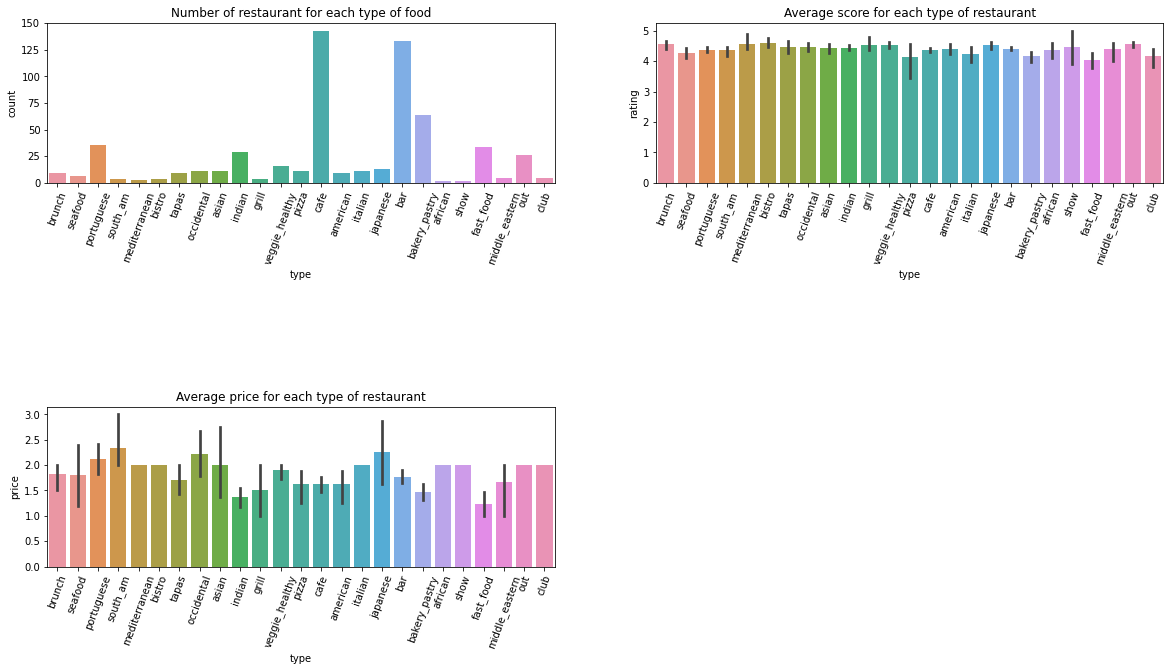

In [410]:
data=data[data.type != 'out1']
data=data[data.type != 'restaurant'] ## IF WE DROP RESTAURANT 

plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
plt.title('Number of restaurant for each type of food')
sns.countplot(data.type)
plt.xticks(rotation=70)

plt.subplot(3,2,2)
plt.title('Average score for each type of restaurant')
sns.barplot(data.type, data.rating)
plt.xticks(rotation=70)

plt.subplot(3,2,5)
plt.title('Average price for each type of restaurant')
sns.barplot(data.type, data.price)
plt.xticks(rotation=70)

#plt.subplot(2,2,3)
#plt.title('Most common localization for each type of restaurant')
#data.groupby(data.type).mean()